<a href="https://colab.research.google.com/github/gikirima/TugasML_Kmeans/blob/main/K_means_custom_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Euclidean Distance**

kmeans merupakan suatu algoritma klustering yang memanfaatkan means dari masing-masing kluster untuk menentukan centroid, yang juga berfungsi untuk meminimalkan jarak antara titik centroid dan data pada kluster. ini membuat euclidean distance menjadi pilihan yang harus dalam algoritma kmeans.
<br> Pada intinya, Euclidean Distance digunakan karena menggunakan algoritma kmeans, bukan sebaliknya.

# Load data

In [ ]:
import pandas as pd

df = pd.read_csv('heart_data.csv')

df.head()

,age,cholesterol,max_hr,st_depression
0,63,233,150,2.3
1,67,286,108,1.5
2,67,229,129,2.6
3,37,250,187,3.5
4,41,204,172,1.4


# Exploratory Data Analysis

In [ ]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30 non-null     int64  
 1   cholesterol    30 non-null     int64  
 2   max_hr         30 non-null     int64  
 3   st_depression  30 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


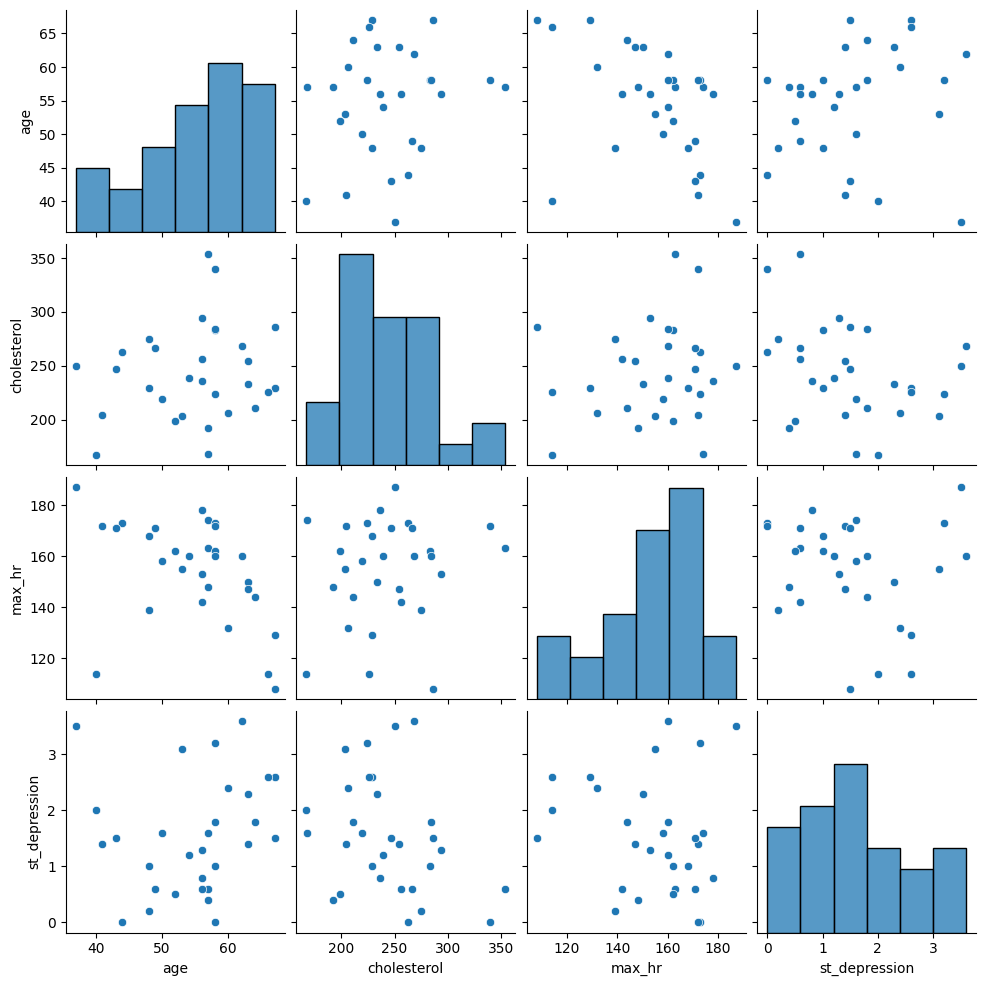

In [ ]:
# visualisasi distribusi masing masing kolom
import seaborn as sns

sns.pairplot(df)

<Axes: >

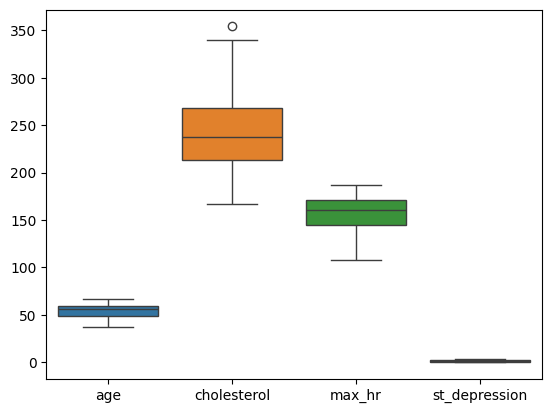

In [ ]:
# visualisasi boxplot dari masing masing kolom
sns.boxplot(data=df)

In [ ]:
# Hitung Q1, Q3, dan IQR
Q1 = df['cholesterol'].quantile(0.25)
Q3 = df['cholesterol'].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outlier
outliers = df[(df['cholesterol'] < (Q1 - 1.5 * IQR)) | (df['cholesterol'] > (Q3 + 1.5 * IQR))]

print("Data kolesterol yang keluar dari boxplot (outliers):")
outliers


Data kolesterol yang keluar dari boxplot (outliers):


,age,cholesterol,max_hr,st_depression
7,57,354,163,0.6


In [ ]:
# hapus data outlier
df = df[(df['cholesterol'] >= (Q1 - 1.5 * IQR)) & (df['cholesterol'] <= (Q3 + 1.5 * IQR))]
df

,age,cholesterol,max_hr,st_depression
0,63,233,150,2.3
1,67,286,108,1.5
2,67,229,129,2.6
3,37,250,187,3.5
4,41,204,172,1.4
5,56,236,178,0.8
6,62,268,160,3.6
8,63,254,147,1.4
9,53,203,155,3.1
10,57,192,148,0.4


In [ ]:
# cari duplikat
df.duplicated().sum()

0

# Preprocessing

In [ ]:
# standarisasi data dengan standarscaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[ 1.02595807, -0.17374726, -0.21861628,  0.72850083],
       [ 1.51773962,  1.20279675, -2.33190697, -0.06872649],
       [ 1.51773962, -0.27763737, -1.27526163,  1.02746108],
       [-2.17062203,  0.26778572,  1.64309219,  1.92434181],
       [-1.67884047, -0.92695059,  0.88834551, -0.16837991],
       [ 0.16534035, -0.09582967,  1.19024418, -0.7663004 ],
       [ 0.90301268,  0.73529124,  0.28454817,  2.02399523],
       [ 1.02595807,  0.37167584, -0.36956561, -0.16837991],
       [-0.20349582, -0.95292311,  0.03296595,  1.52572815],
       [ 0.28828574, -1.23862093, -0.31924917, -1.16491406],
       [ 0.16534035,  1.41057698, -0.06766694, -0.26803332],
       [ 0.16534035,  0.4236209 , -0.62114784, -0.96560723],
       [-1.31000431,  0.6054286 ,  0.93866196, -1.56352772],
       [-0.3264412 , -1.05681323,  0.38518106, -1.06526065],
       [ 0.28828574, -1.86196161,  0.9889784 ,  0.03092692],
       [-0.81822276, -0.27763737,  0.68707973, -0.56699357],
       [-0.08055043, -0.

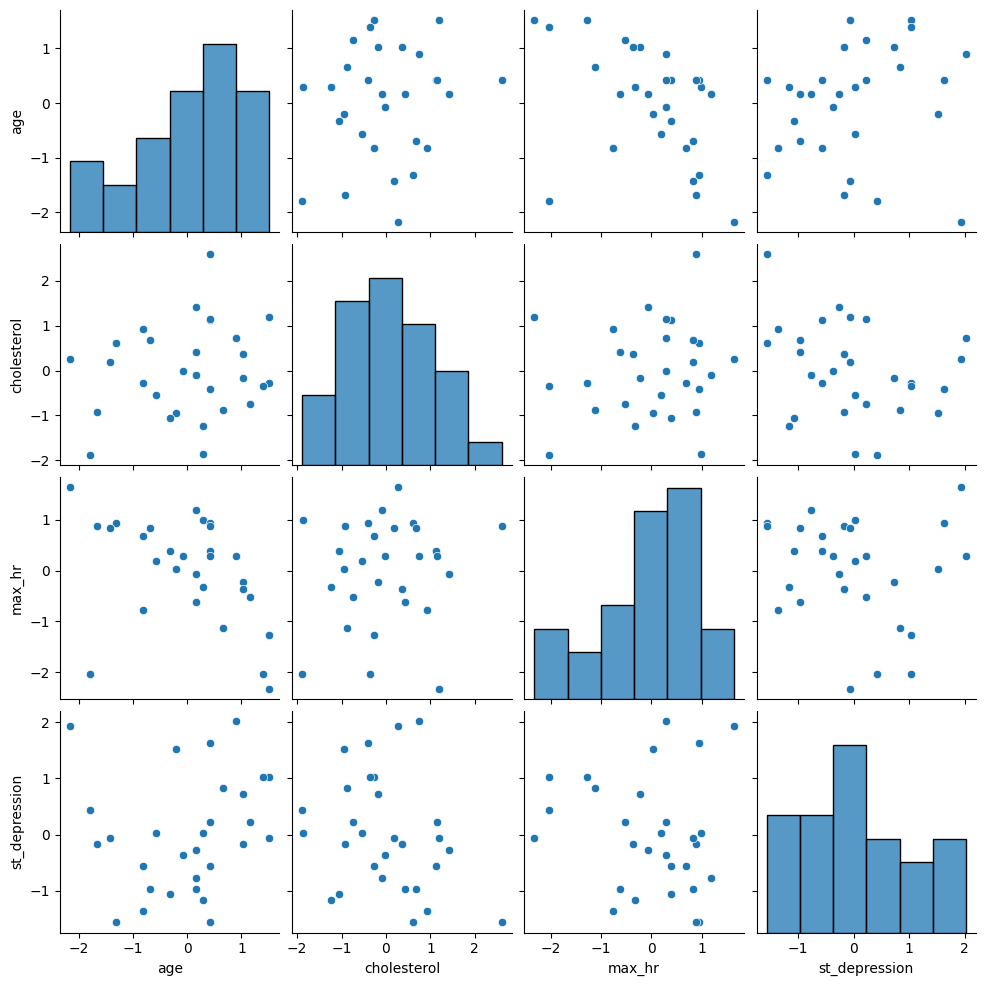

In [ ]:
# visualisasi data setelah standarisasi
sns.pairplot(pd.DataFrame(df_scaled, columns=df.columns))

# Terapkan Algoritma K-means metric euclidean distance (cukup dengan library dari sklearn)

In [ ]:
# algoritma K-means, k=2
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit_predict(df_scaled)

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1], dtype=int32)

# Visualisasi dengan PCA

In [ ]:
# reduksi dimensi dengan PCA terhadap dataset asli untuk visualisasi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[-1.10920979, -0.01520689],
       [-2.16619697,  1.90634744],
       [-2.23365487,  0.1166116 ],
       [ 1.59635816, -1.86407884],
       [ 1.49120142, -1.45431418],
       [ 0.97442917,  0.20097147],
       [-1.10002551, -0.06867659],
       [-0.71963708,  0.84742036],
       [-0.68720182, -1.54197053],
       [-0.10889457, -0.21353586],
       [ 0.23248587,  1.27485934],
       [-0.00557101,  0.93799714],
       [ 2.18250336,  0.52221451],
       [ 0.70753819, -0.4809565 ],
       [ 0.1009318 , -1.43704893],
       [ 1.13038819, -0.3798387 ],
       [ 0.38615952,  0.08922421],
       [ 0.75828667,  1.10591334],
       [ 1.50171508,  0.5693903 ],
       [-1.26932638, -0.11547507],
       [ 0.44899297,  1.24386989],
       [ 0.04669748,  0.89577092],
       [-0.42183817, -1.04074857],
       [-1.63857556, -0.62548579],
       [ 0.35313137, -0.68921151],
       [ 1.47410785,  2.77180829],
       [-2.6574366 ,  0.10914253],
       [ 1.47344594, -0.54591841],
       [-0.74080469,

Text(0, 0.5, 'Explained Variance Ratio')

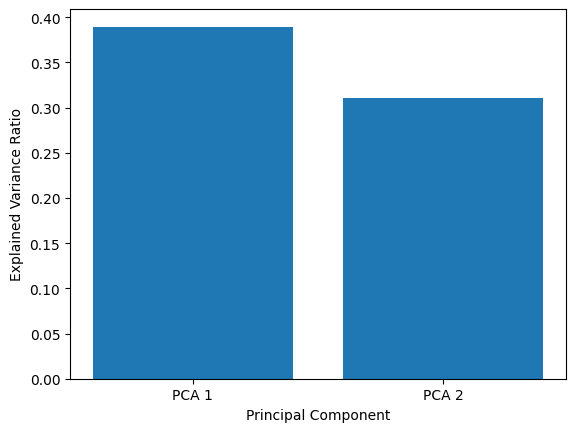

In [ ]:
# bar graph penjelasan varians data dengan PCA
import matplotlib.pyplot as plt

plt.bar(['PCA 1','PCA 2'], pca.explained_variance_ratio_)
# plot bar X adalah PCA 1 dan PCA 2
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

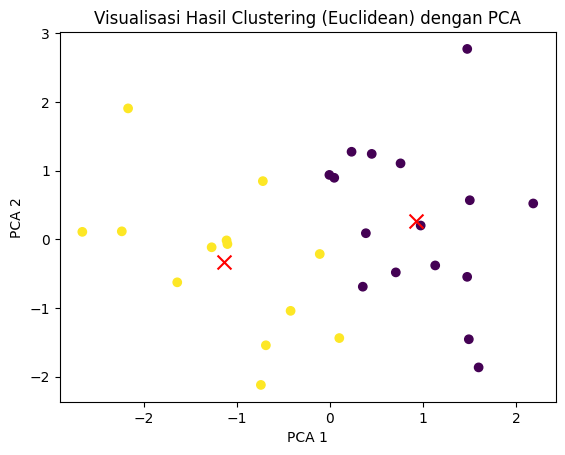

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
import matplotlib.pyplot as plt

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Euclidean) dengan PCA')

# tampilkan centroid
centroids = kmeans.cluster_centers_
centroids = pca.transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

# **CityBlock (Manhattan Distance)**

karena kmeans menggunakan nilai means untuk meminimalkan distance antara centroid dan data kluster (dalam hal ini Euclidean Distance), Manhattan Distance sebenarnya bukan merupakan metrik yang cocok sebagai pengukur jarak.

In [ ]:
import numpy as np

# Fungsi Manhattan Distance
def manhattan_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b))

# fungsi kustom k-means dengan metric manhattan distance
def custom_kmeans_manhattan(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([manhattan_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0) # bisa pakai median untuk memperbarui titik
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_manhattan, centroids_manhattan = custom_kmeans_manhattan(df_scaled, n_clusters=2)


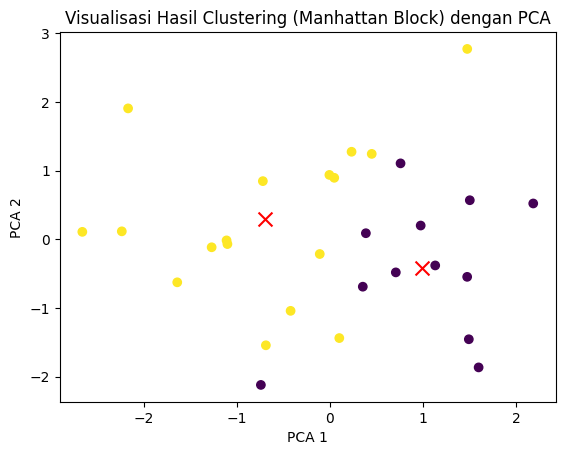

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_manhattan)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Manhattan Block) dengan PCA')

# tampilkan centroid
centroids_manhattan = pca.transform(centroids_manhattan)
plt.scatter(centroids_manhattan[:, 0], centroids_manhattan[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

sebagai alternatif, kita dapat menggunakan kmedian, yaitu optimasi sum of distance dengan menggunakan median

In [ ]:
import numpy as np

# Fungsi Manhattan Distance
def manhattan_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b))

# fungsi kustom k-mediandengan metric manhattan distance
def custom_kmedian_manhattan(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([manhattan_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan median
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.median(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_manhattan_med, centroids_manhattan_med = custom_kmedian_manhattan(df_scaled, n_clusters=2)


# **Chebyshev Distance**

In [ ]:
# Fungsi Chebyshev Distance
def chebyshev_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.max(np.abs(a - b))

# fungsi kustom k-means dengan metric manhattan distance
def custom_kmeans_chebyshev(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([chebyshev_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_chebyshev, centroids_chebyshev = custom_kmeans_chebyshev(df_scaled, n_clusters=2)


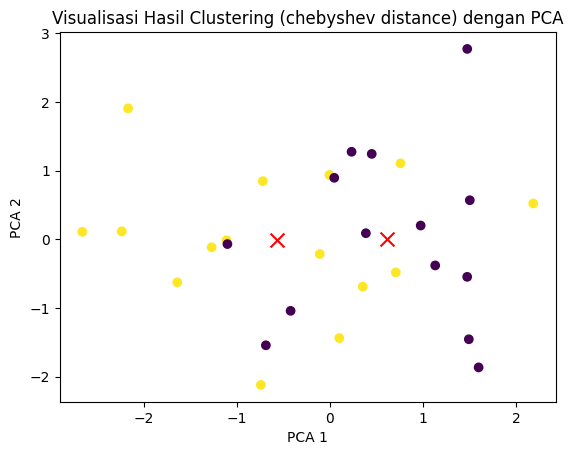

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_chebyshev)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (chebyshev distance) dengan PCA')

# tampilkan centroid
centroids_chebyshev = pca.transform(centroids_chebyshev)
plt.scatter(centroids_chebyshev[:, 0], centroids_chebyshev[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

# **Jarak Minkowski**

Jarak minkowski adalah generalisasi dari rumus jarak di atas, sehingga rumus dari minkowski distance dapat mereproduksi rumus jarak.

In [ ]:
# Fungsi Minkowski distance
def minkowski_distance(a, b, p=2):
    """
    Menghitung Minkowski distance antara dua vektor a dan b.
    p = 1 untuk manhattan distance, 2 untuk euclidean distance, dan tak terhingga untuk chebyshev
    """
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b)**p)**(1/p)

# fungsi kustom k-means dengan metric manhattan distance
def custom_kmeans_minkowski(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([minkowski_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_minkowski, centroids_minkowski = custom_kmeans_minkowski(df_scaled, n_clusters=2)


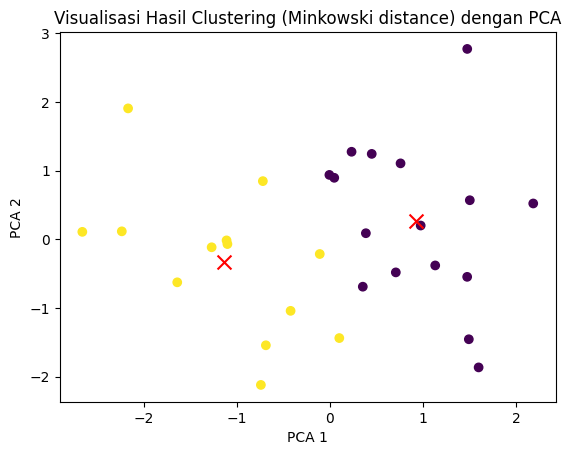

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_minkowski)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (Minkowski distance) dengan PCA')

# tambahkan marker centroid
centroids_minkowski = pca.transform(centroids_minkowski)
plt.scatter(centroids_minkowski[:, 0], centroids_minkowski[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()

# **Canberra Distance**

In [ ]:
# Fungsi Canberra Distance
def canberra_distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(np.abs(a - b) / (np.abs(a) + np.abs(b) + 1e-10))  # tambahkan epsilon untuk menghindari pembagian dengan nol

# fungsi kustom k-means dengan metric manhattan distance
def custom_kmeans_canberra(X, n_clusters=2, max_iter=100, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape

    # inisiasi centroid secara acak
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for iteration in range(max_iter):
        # buat kluster berdasarkan manhattan distance
        labels = np.array([
            np.argmin([canberra_distance(x, c) for c in centroids])
            for x in X
        ])

        # mengubah titik centroid dengan mean
        new_centroids = []
        for i in range(n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                new_centroid = np.mean(cluster_points, axis=0)
            else:
                new_centroid = centroids[i]
            new_centroids.append(new_centroid)

        new_centroids = np.array(new_centroids)

        # break jika centroid tidak berubah
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# run algoritma klustering
labels_canberra, centroids_canberra = custom_kmeans_canberra(df_scaled, n_clusters=2)


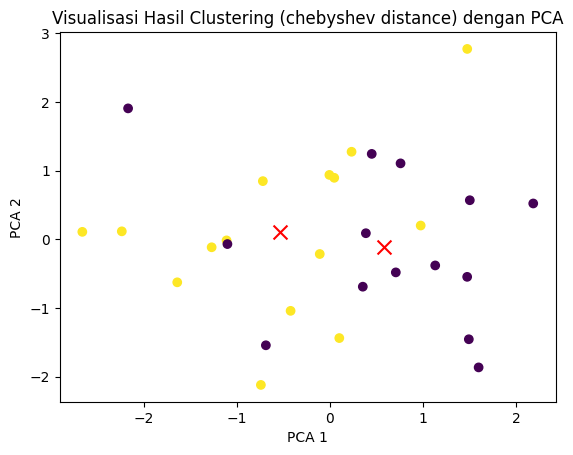

In [ ]:
# visualisasikan df_PCA dengan warna hasil clustering
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels_canberra)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Hasil Clustering (chebyshev distance) dengan PCA')

# tampilkan centroid
centroids_canberra = pca.transform(centroids_canberra)
plt.scatter(centroids_canberra[:, 0], centroids_canberra[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.show()